## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [71]:
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)

In [72]:
df = pd.read_csv('mkrf_movies.csv')
df1 = pd.read_csv('mkrf_shows.csv')

In [73]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [74]:
df1.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [77]:
df['puNumber'] = df['puNumber'].replace('нет', 0)
df['puNumber'] = df['puNumber'].astype('int')
data = df.merge(df1, on='puNumber', how='left')
data['puNumber'] = df['puNumber'].replace(0, None)
data = data.dropna(subset=['puNumber'])

In [78]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   object 
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [80]:
# Меняем данные на формат даты
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
#Приводим рейтинг к единиму формату и фереводим в тип float
data['ratings'] = data['ratings'].str.replace('%', '')
data['ratings'] = data['ratings'].astype('float').apply(lambda x: x/10 if x>10 else x)

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [81]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

Пропуски присутствуют в следующих данных:
- 18 - film_studio - студия-производитель - Заменим на "Неизвестно".
- 2 - production_country - страна-производитель - Заменим на "Неизвестно".
- 9 - director - режиссёр - Заменим на "Неизвестно".
- 568 - producer - продюсер - Заменим на "Неизвестно".
- 7153 - refundable_support - объём возвратных средств государственной поддержки - Заминим на "0", так как небыло государственной поддержки.
- 7153 - nonrefundable_support - объём невозвратных средств государственной поддержки - Заминим на "0", так как небыло государственной поддержки.
- 7153 - budget - общий бюджет фильма - Оставим пропуски, так как фильм не мог быть снят без бюджета. Значит информация отсутствует.
- 7153 - financing_source - источник государственного финансирования - Заминим на "Отсутствует".
- 966 - ratings - рейтинг фильма на КиноПоиске - Оставим пропуски, информация отсутствует.
- 975 - genres - жанр фильма - Заменим на "Неизвестно".
- 4327 - box_office - сборы в рублях - Оставим пропуски, информация отсутствует.

In [82]:
fill_unknown_data = ['film_studio', 'production_country', 'director', 'producer', 'genres']
for v in fill_unknown_data:
    data[v] = data[v].fillna('Неизвестно')

fill_zero_data = ['refundable_support', 'nonrefundable_support']
for v in fill_zero_data:
    data[v] = data[v].fillna(0)

data['financing_source'] = data['financing_source'].fillna('Отсутствует')

In [83]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                   7153
financing_source            0
ratings                   966
genres                      0
box_office               4327
dtype: int64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [84]:
data.duplicated().sum()

0

Полные дубликаты отсутствуют

In [85]:
data['title'].duplicated().sum()

714

Присутствуют дубликаты по названию фильмов

In [86]:
data[data['title'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,7.7,"фэнтези,приключения,семейный",759526.00
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,0.0,0.0,NaN,Отсутствует,8.2,"фэнтези,приключения,семейный",1125302.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"триллер,криминал,детектив",NaN


In [87]:
data[data['title'] == 'Особо опасен']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN


Видим, что название фильмов дублируются при разных датах показа. Возможно, это связано с тем, что фильмы показывались в разных кинотеатрах или в разное время.

In [88]:
data[data['title'] == 'Алекс и Эмма']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
40,Алекс и Эмма,221005015,2015-02-25 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,6.4,"мелодрама,комедия",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,6.4,"мелодрама,комедия",NaN
4581,Алекс и Эмма,221156910,2010-12-17 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,6.4,"мелодрама,комедия",NaN


Подтвердили вывод, посмотрев на дубликаты по названию фильмов и дате показа. Видим, что фильмы показывались в разное время.

In [89]:
data[data['title'] == 'Зверь']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5988,Зверь,121013518,2018-07-05 12:00:00+00:00,Художественный,"Агиле Филмз, Бэ Эф И, Фильм Фонд, Филм Фо, Стр...",Великобритания,Майкл Пирс,"Кристиан Броуди, Лорен Дарк, Ивана МакКиннон",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.5,"триллер,драма",5544612.00
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.5,"триллер,драма",175003.51


Также, есть фильмы с одинаковым названием, но разными продюсерами, странами и другими данными. Скорее всего, это разные фильмы с одинаковым названием.

In [90]:
print(data['puNumber'].duplicated().sum())
data[data['puNumber'].duplicated()]

2


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,NaN,Отсутствует,6.8,"комедия,криминал",NaN


Есть два дубликата по номеру прокатного удостоверения.

In [91]:
data[data['puNumber'] == 221154310]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,7.6,"драма,мелодрама,история",NaN


Дубликаты по номеру прокатного удостоверения не влияют на результаты исследования.

In [92]:
data[data['puNumber'] == 221054410]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,NaN,Отсутствует,6.8,"комедия,криминал",NaN


Аналогичная ситуация по номеру прокатного удостоверения.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [93]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [94]:
data['type'] = data['type'].str.strip()

In [95]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Убрали неявные дубликаты в столбце type

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [96]:
#Добавляем столбец year с годом выхода фильма
data['year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [97]:
#Создаем два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.
data['main_director'] = data['director'].str.split(',').str[0]
data['main_genre'] = data['genres'].str.split(',').str[0]

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [98]:
#Определяем какую долю от общего бюджета фильма "budget" составляет государственная поддержка "refundable_support" и "nonrefundable_support". Добавляем столбец с этими данными с названием 'state_support'.
data['state_support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

In [99]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,state_support
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,«6+» - для детей старше 6 лет,0.0,0.0,NaN,Отсутствует,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

<AxesSubplot:>

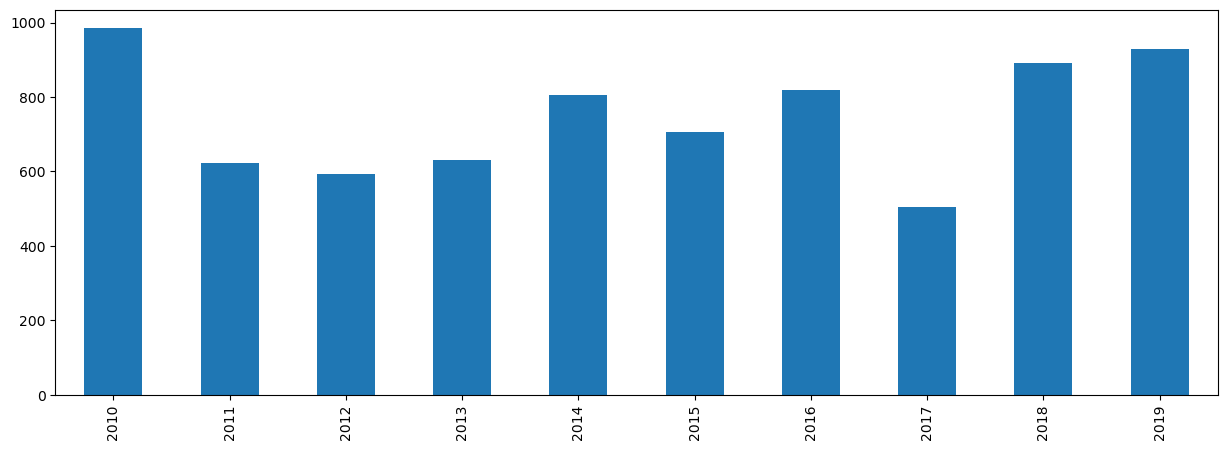

In [103]:
#Определяем количество фильмов выходивших каждый год. И построим гистограмму по порядку возрастания года.
data['year'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5))

In [105]:
#Определяем какую долю составлают фильмы с пропуском данных в столбце 'box_office' от общего количества фильмов.
data['box_office'].isna().sum() / data['title'].count()

0.5780895123580494

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

<AxesSubplot:xlabel='year'>

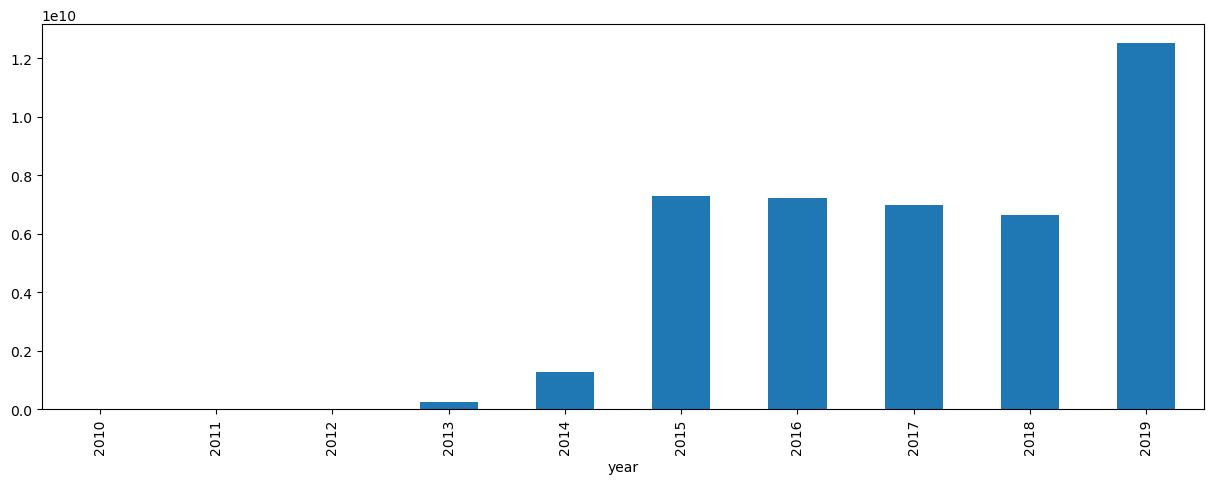

In [106]:
#Определяем сумарный бюджет фильмов по годам и строим график по порядку возрастания года.
data.groupby('year')['budget'].sum().sort_index().plot(kind='bar', figsize=(15, 5))

In [111]:
#Формируем сводную таблицу по годам выхода фильмов и определяем их количество и суммарный бюджет.
data.pivot_table(index='year', values=['title', 'budget'], aggfunc={'title': 'count', 'budget': 'sum'})


,budget,title
year,,
2010,0.000000e+00,985
2011,0.000000e+00,622
2012,0.000000e+00,593
2013,2.554354e+08,630
2014,1.279485e+09,806
2015,7.309669e+09,705
2016,7.228943e+09,818
2017,6.972173e+09,505
2018,6.651695e+09,891


- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

<AxesSubplot:xlabel='year'>

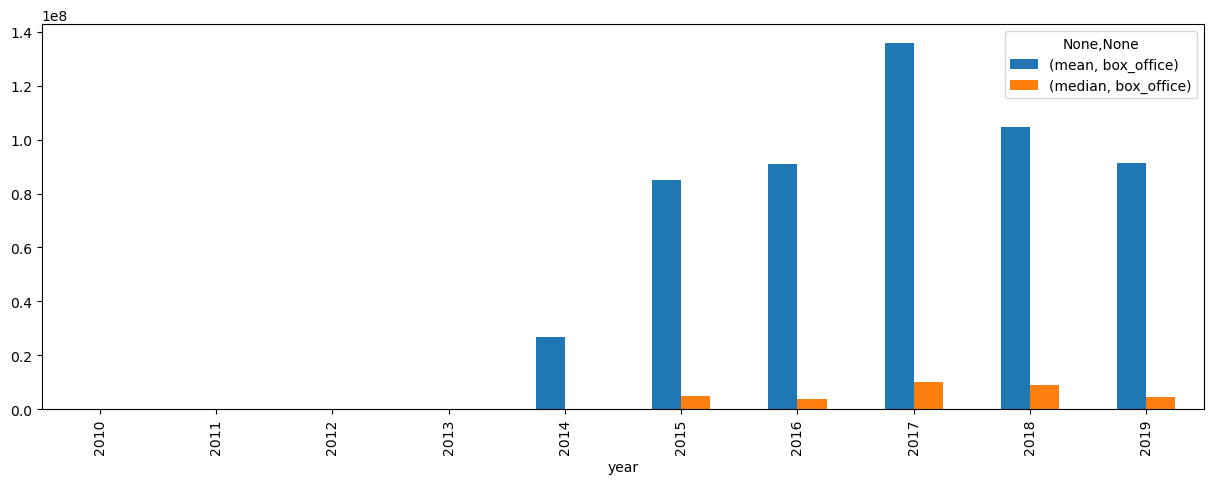

In [114]:
#Формируем сводную таблицу и определяем среднюю и медианную сумму сборов для каждого года. Построим график по порядку возрастания года по каждому из значений.
data.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median']).sort_index().plot(kind='bar', figsize=(15, 5))

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

<AxesSubplot:xlabel='year'>

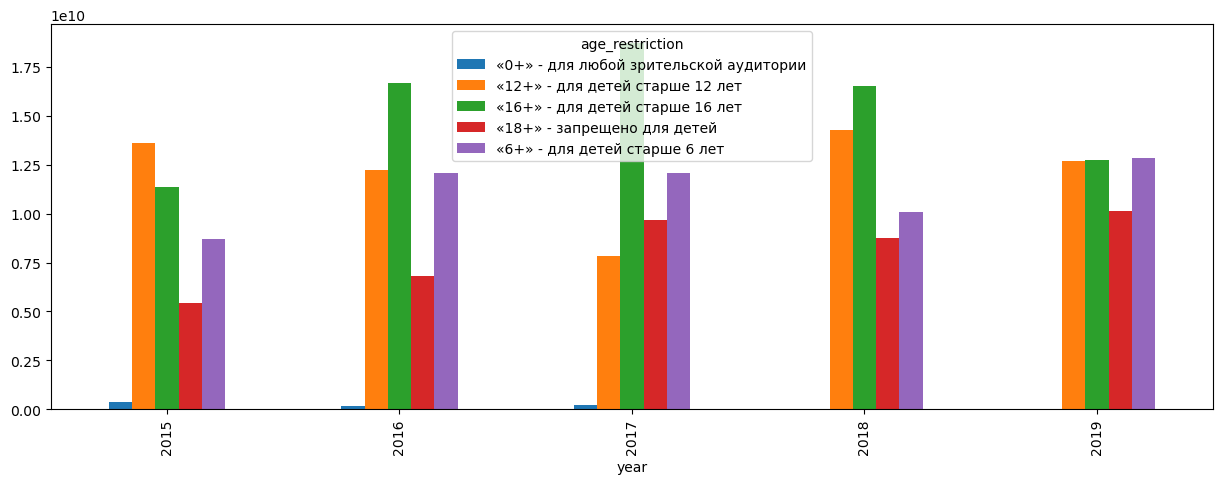

In [118]:
#Собираем сводную таблицу сгрупированную по столбцам 'year' и 'age_restriction' и определяем сумму сборов для каждого года и возрастного рейтинга. Берем данные с 2015 до 2019 года. И построим график по порядку возрастания года. 
data.query('2015 <= year <= 2019').pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum').sort_index().plot(kind='bar', figsize=(15, 5))

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

### Шаг 5. Напишите общий вывод